MLP (MULTI-LAYER-PERCEPTON)

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# Build the vocabulary of characters and ampping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)} #start at 1 (str to int)
stoi['.'] = 0 #set as first in vocab -> special token
itos = {i:s for s, i in stoi.items()} #values to correct position sorted + tokens (int to str)
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# Build the dataset

block_size = 3 #context length: how many characters do we take to predict the next one
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch] # char in sequence
    X.append(context) # curr runing context
    Y.append(ix) # current char
    #print('.'.join(itos[i] for i in context), '----->', itos[ix]) #examples that can be generated
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
# Building the dataset
def build_dataset(words):
  block_size = 3 #context length: how many characters do we take to predict the next
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print('.'.join(itos[i] for i in context), '----->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, X.dtype, Y.shape, Y.dtype)
  return X, Y

# Train, dev/val, test split
import random
random.seed(42)
random.shuffle(words)
#n1 80% words weight and n2 90% words weights
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.int64 torch.Size([182625]) torch.int64
torch.Size([22655, 3]) torch.int64 torch.Size([22655]) torch.int64
torch.Size([22866, 3]) torch.int64 torch.Size([22866]) torch.int64


In [ ]:
len(words)

32033

In [ ]:
n1

25626

In [ ]:
n2

28829

In [ ]:
n2 - n1

3203

In [ ]:
len(words) - n2

3204

In [ ]:
X # -> inputs

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y # -> labels

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
#Look-up table C (Embedding)
C = torch.randn((27, 2))

In [ ]:
C

tensor([[-0.4118, -0.5745],
        [ 0.1900, -1.0730],
        [-0.2294, -1.1274],
        [-1.7837, -0.0510],
        [-0.3753, -0.8991],
        [ 0.9722, -0.7080],
        [-0.8181, -0.5305],
        [ 2.3250,  1.9845],
        [ 0.1542,  0.9066],
        [ 1.0215,  0.5487],
        [ 0.2630,  1.4410],
        [-1.9347,  0.0518],
        [-1.1560,  1.3892],
        [ 1.5220,  0.0674],
        [ 1.1687,  1.2741],
        [-0.1342, -1.0029],
        [ 0.4349,  0.7202],
        [ 0.6019,  0.5202],
        [-0.3935, -0.4979],
        [-0.5704,  1.1709],
        [ 1.2471,  2.1378],
        [ 1.5800,  0.3714],
        [-0.3916,  0.1022],
        [ 1.0442,  1.8628],
        [-1.5997, -1.3101],
        [-0.4356, -1.1254],
        [-0.5469,  0.4261]])

In [ ]:
C[X]

tensor([[[-0.2061, -0.6545],
         [-0.2061, -0.6545],
         [-0.2061, -0.6545]],

        [[-0.2061, -0.6545],
         [-0.2061, -0.6545],
         [ 1.2118, -0.2868]],

        [[-0.2061, -0.6545],
         [ 1.2118, -0.2868],
         [-0.9138,  0.8267]],

        [[ 1.2118, -0.2868],
         [-0.9138,  0.8267],
         [-0.9138,  0.8267]],

        [[-0.9138,  0.8267],
         [-0.9138,  0.8267],
         [ 0.4832, -0.5302]],

        [[-0.2061, -0.6545],
         [-0.2061, -0.6545],
         [-0.2061, -0.6545]],

        [[-0.2061, -0.6545],
         [-0.2061, -0.6545],
         [ 0.6878, -1.3108]],

        [[-0.2061, -0.6545],
         [ 0.6878, -1.3108],
         [-1.0588,  0.8155]],

        [[ 0.6878, -1.3108],
         [-1.0588,  0.8155],
         [ 0.1469,  1.1720]],

        [[-1.0588,  0.8155],
         [ 0.1469,  1.1720],
         [ 1.6805, -0.0580]],

        [[ 0.1469,  1.1720],
         [ 1.6805, -0.0580],
         [ 0.1469,  1.1720]],

        [[ 1.6805, -0

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn((6, 100)) # (3x2, N-neurons)
b1 = torch.randn(100)

In [ ]:
#Transformation of shape (32, 3, 2) into (32, 6) so we can multpily by (W1 + b1) -> efficient way (-1, 1)-> tanh
#broadcasting appears for the + b1(1, 100) to (32, 100) -> b1 braodcast to all 32 rows -> first 5 names from file
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # instead of 'emb.shape[0]' can use -1

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
logits

tensor([[-9.0199e+00, -8.5657e+00,  7.7841e+00,  8.3138e+00, -1.1293e+01,
          3.4938e+00, -1.1428e+01,  5.3080e+00,  8.7730e+00,  3.1765e+00,
          3.5746e+00,  7.9812e+00,  3.9048e+00, -8.5083e+00,  1.9461e+01,
          1.9325e+00,  3.8868e+00,  5.6033e+00,  2.0780e+00, -7.4902e-01,
          7.2778e+00, -1.4854e+00, -2.3459e+00,  4.9339e+00, -8.7286e+00,
         -1.3726e+01,  1.0703e+01],
        [-9.3713e+00, -7.9514e+00,  7.3507e+00,  8.0534e+00, -1.1734e+01,
          3.3555e+00, -1.1221e+01,  5.5521e+00,  7.8985e+00,  2.8003e+00,
          4.2855e+00,  7.0861e+00,  4.1482e+00, -8.0603e+00,  2.0397e+01,
          1.8540e+00,  4.6733e+00,  5.8707e+00,  1.8736e+00, -5.9801e-01,
          6.7016e+00, -2.2517e+00, -2.5461e+00,  4.9322e+00, -8.4685e+00,
         -1.4682e+01,  1.1942e+01],
        [-1.1495e+01, -6.9194e+00, -1.8017e+00,  9.2357e+00, -1.3125e+01,
          1.4847e+00, -6.2145e+00,  6.6909e+00,  5.3932e+00,  3.5087e+00,
          9.0270e+00,  6.2643e+00,  3.19

In [ ]:
# Now we want the fake counts by exp the logits
counts = logits.exp()

In [ ]:
# After to normalize probability
probs = counts / counts.sum(1, keepdims=True)

In [ ]:
probs.shape

torch.Size([32, 27])

In [ ]:
#check if probabilities sum up to 1
probs[0].sum()

tensor(1.)

In [ ]:
# We want to plack-out to the probability assigned to the correct character from Y (..... -> e) and so on for all 32 characters
# Get the actual negetive log-likehood = loss
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(19.2773)

# MORE ORDERED OF ALL TOGETHER

In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182580, 3]), torch.Size([182580]))

In [ ]:
# Scaling size of NN occurs here and embedding scaling also
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # Scaling embeddings 2 -> 10
W1 = torch.randn((30, 200), generator=g) # Scaling 100 -> 200 (NN size)
b1 = torch.randn(200, generator=g) # Scaling 100 -> 200 (NN size)
W2 = torch.randn((200, 27), generator=g) # Scaling 100 -> 200 (NN size)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2] # Cluster all paramerters into a list of parameters
parameters

[tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
          -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01],
         [-4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
           2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01],
         [ 9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
           2.4968e+00,  2.4448e+00, -6.7006e-01, -1.2199e+00,  3.0314e-01],
         [-1.0725e+00,  7.2762e-01,  5.1114e-02,  1.3095e+00, -8.0220e-01,
          -8.5042e-01, -1.8068e+00,  1.2523e+00, -1.2256e+00,  1.2165e+00],
         [-9.6478e-01, -2.3211e-01, -3.4762e-01,  3.3244e-01, -1.3263e+00,
           1.1224e+00,  5.9641e-01,  4.5846e-01,  5.4011e-02, -1.7400e+00],
         [ 1.1560e-01,  8.0319e-01,  5.4108e-01, -1.1646e+00,  1.4756e-01,
          -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01, -7.8305e-01],
         [ 1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,  9.3743e-01,
          -8.8303e-

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True # Pytorch must do

In [ ]:
# Optimizing learning rate
lre = torch.linspace(-3, 0, 1000) # steping linearly form from 0.001 to 1
lrs = 10**lre # exponential step
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:

for i in range(200000):
  #mini-batch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # Forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix]) # More cleaner way to get loss using (built-in cross-entropy loss function form Pytorch) use always on classification
  #print(loss.item())
  # Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01 # -> 10^-1(0.1), lr-decay by adding 0.001
  for p in parameters:
    p.data += -lr * p.grad # -> (W^[l] A^[l-1] - learning-rate dW^[l])

  #track statistics
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())


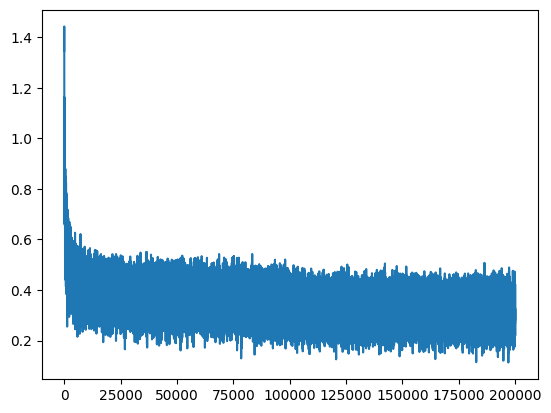

In [ ]:
#Plot for step vs. loss
plt.plot(stepi, lossi)

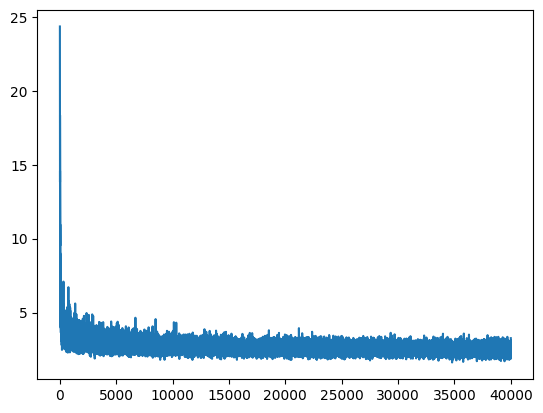

In [ ]:
#Plot of Step vs. loss
plt.plot(stepi, lossi) # ticknes on it bc we are optimizing over the mini-batches

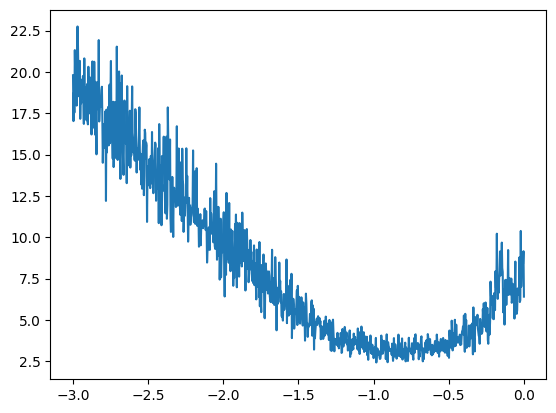

In [ ]:
#Plot of lr vs. loss
plt.plot(lri, lossi) # x-axis lr and y-axis loss

In [ ]:
# see how model is currently performing
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1261, grad_fn=<NllLossBackward0>)

In [ ]:
# see how model is currently performing
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1684, grad_fn=<NllLossBackward0>)

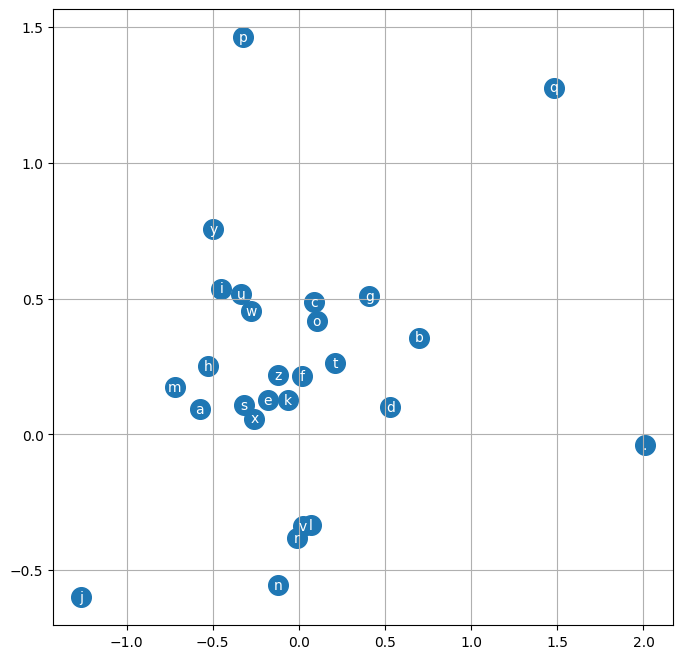

In [ ]:
# Visulize the embdding vectors -> each character is a point and king of cluster the characters based on what the model learned
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i],ha="center", va="center", color="white")
plt.grid('minor')

- We can continue the Optimization
- Scaling more the NN
- Increase number of charcter as input

In [ ]:
# Sampling from the model efficiently
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  out = []
  context = [0] * block_size # initialize with all ...
  while True:
    emb = C[torch.tensor([context])] # (1, block_size)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))
